In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data
from keras.datasets import mnist
import time

In [4]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM


In [5]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    SVC()  
]

title = [
    'Naiwny Bayes',
    'LDA',
    'Nearest Mean',
    'kNN1',
    'kNN3',
    'kNN5',
    'kNN7',
    'SVM'
]

wavelet_type = 'db3'

In [6]:
(xtrain_mnist, y_train_mnist),(dataset, label) = mnist.load_data()

In [7]:
dataset_reshape = np.reshape(dataset, (dataset.shape[0], -1))
label_reshape = np.array(label, dtype=int)



xTest_mnist = np.reshape(xtrain_mnist, (xtrain_mnist.shape[0], -1))
y_test_mnist = np.array(y_train_mnist, dtype=int)

In [8]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [39]:
images_haar_LL = np.empty(shape=(10000,16,16))
images_haar_LH = np.empty(shape=(10000,16,16))
images_haar_HL = np.empty(shape=(10000,16,16))
images_haar_HH = np.empty(shape=(10000,16,16))
for i in range(len(dataset)):
    db_decompo = pywt.dwt2(dataset[i], wavelet_type)
    LL, (LH, HL, HH) = db_decompo
    images_haar_LL[i] = LL
    images_haar_LH[i] = LH
    images_haar_HL[i] = HL
    images_haar_HH[i] = HH

In [40]:
images_haar_LL_reshape = np.reshape(images_haar_LL, (images_haar_LL.shape[0], -1))
images_haar_LH_reshape = np.reshape(images_haar_LH, (images_haar_LH.shape[0], -1))
images_haar_HL_reshape = np.reshape(images_haar_HL, (images_haar_HL.shape[0], -1))
images_haar_HH_reshape = np.reshape(images_haar_HH, (images_haar_HH.shape[0], -1))

In [41]:
decompo_list = [images_haar_LL_reshape, images_haar_LH_reshape, images_haar_HL_reshape,images_haar_HH_reshape]
type_name = ['LL','LH','HL','HH']

In [12]:
test_sample = 0.4
for index, k in enumerate(decompo_list):
  print(type_name[index])
  for idx, i in enumerate(classifiers):
    print('Model: ',i)
    sumAcc = 0
    meanAcc = 0
    start_time = time.time() 
    for j in range(10):
        model = i
        predicted, X_test, y_test = fit_model(i,test_sample, k, label)
        sumAcc += metrics.accuracy_score(y_test, predicted)
    meanAcc = sumAcc/10
    end_time = time.time()  # Koniec mierzenia czasu
    elapsed_time = end_time - start_time
    print('Średnia dokłądności: ',meanAcc)
    print('Czas obliczania: ', elapsed_time, ' sekund')
  

LL
Model:  GaussianNB()
Średnia dokłądności:  0.529525
Czas obliczania:  1.6754467487335205  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.864625
Czas obliczania:  3.648193359375  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.819275
Czas obliczania:  0.2724192142486572  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.952375
Czas obliczania:  4.4233314990997314  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9506
Czas obliczania:  4.458291053771973  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9508749999999999
Czas obliczania:  4.483487606048584  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.946875
Czas obliczania:  4.7365641593933105  sekund
Model:  SVC()
Średnia dokłądności:  0.960875
Czas obliczania:  37.293521881103516  sekund
LH
Model:  GaussianNB()
Średnia dokłądności:  0.513175
Czas obliczania:  1.6604390144348145  sekund
Model: 

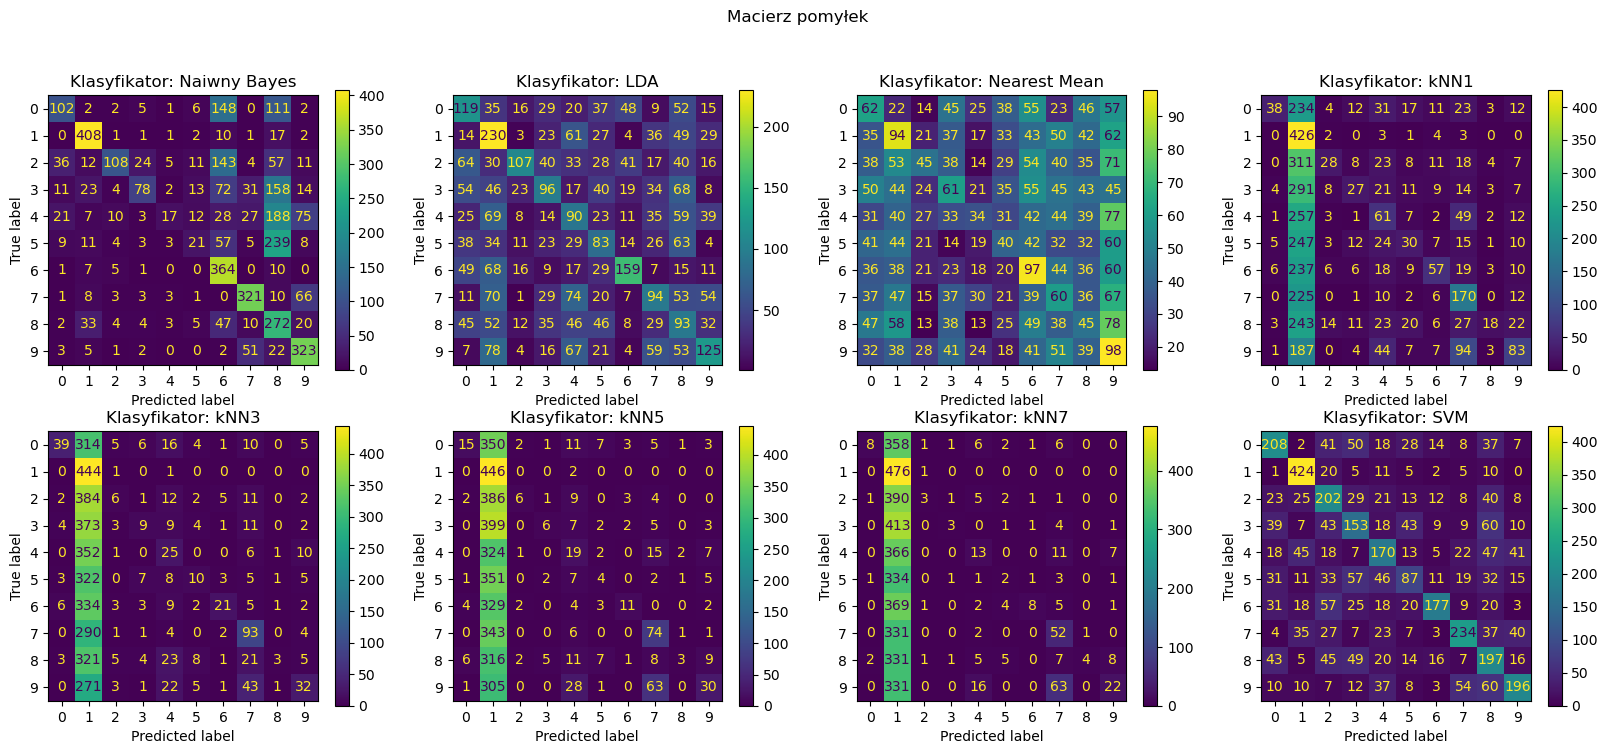

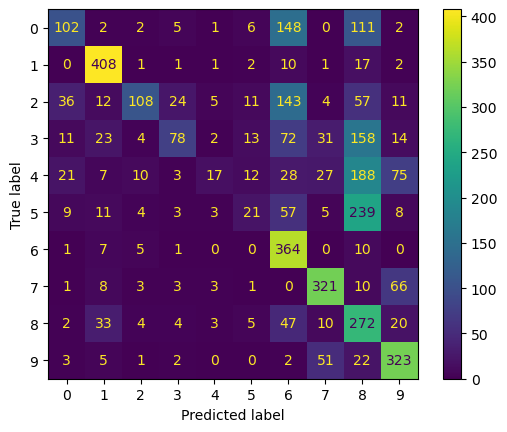

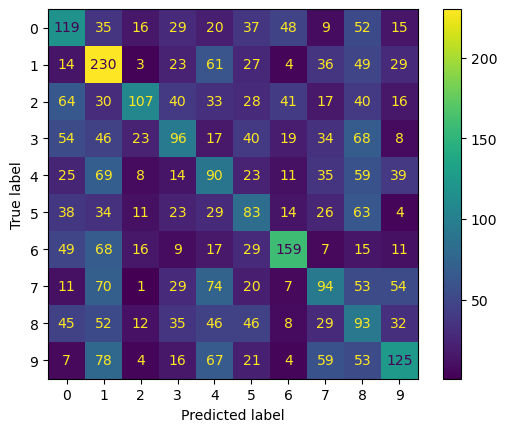

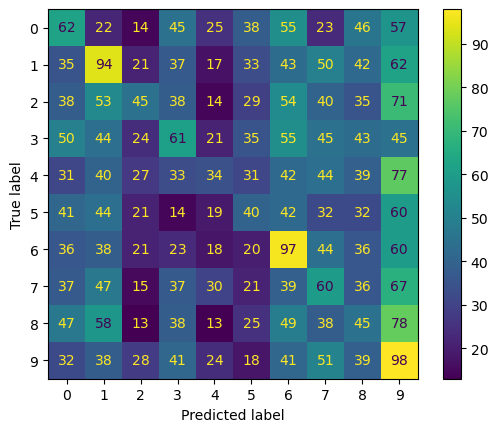

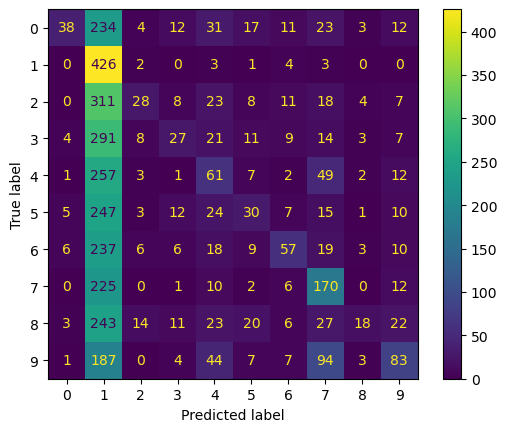

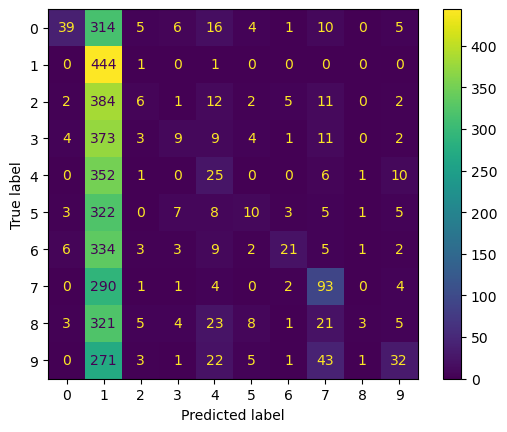

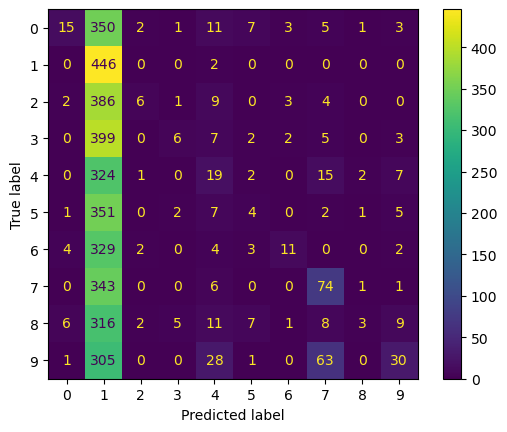

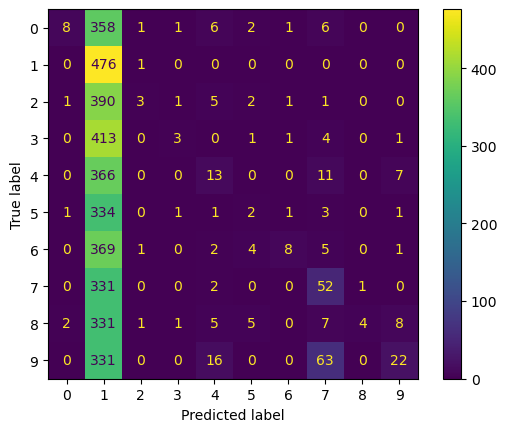

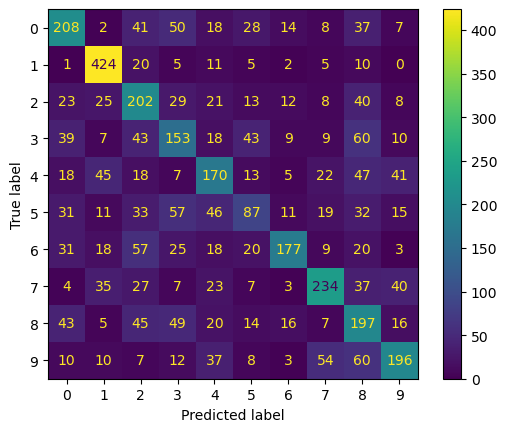

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_HH_reshape, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()


Haar Lvl 2

In [13]:
images_haar_LL2 = np.empty(shape=(10000,10,10))
images_haar_LH2 = np.empty(shape=(10000,10,10))
images_haar_HL2 = np.empty(shape=(10000,10,10))
images_haar_HH2 = np.empty(shape=(10000,10,10))


for i in range(len(images_haar_LL)):
    db_decompo_2 = pywt.dwt2(images_haar_LL[i], wavelet_type)
    LL, (LH, HL, HH) = db_decompo_2
    images_haar_LL2[i] = LL
    images_haar_LH2[i] = LH
    images_haar_HL2[i] = HL
    images_haar_HH2[i] = HH

In [14]:
images_haar_LL2_reshape = np.reshape(images_haar_LL2, (images_haar_LL2.shape[0], -1))
images_haar_LH2_reshape = np.reshape(images_haar_LH2, (images_haar_LH2.shape[0], -1))
images_haar_HL2_reshape = np.reshape(images_haar_HL2, (images_haar_HL2.shape[0], -1))
images_haar_HH2_reshape = np.reshape(images_haar_HH2, (images_haar_HH2.shape[0], -1))

In [15]:
decompo_list = [images_haar_LL2_reshape, images_haar_LH2_reshape, images_haar_HL2_reshape,images_haar_HH2_reshape]
type_name = ['LL2','LH2','HL2','HH2']

In [16]:
test_sample = 0.4
for index, k in enumerate(decompo_list):
  print(type_name[index])
  for idx, i in enumerate(classifiers):
    print('Model: ',i)
    sumAcc = 0
    meanAcc = 0
    start_time = time.time() 
    for j in range(10):
        model = i
        predicted, X_test, y_test = fit_model(i,test_sample, k, label)
        sumAcc += metrics.accuracy_score(y_test, predicted)
    meanAcc = sumAcc/10
    end_time = time.time()  # Koniec mierzenia czasu
    elapsed_time = end_time - start_time
    print('Średnia dokłądności: ',meanAcc)
    print('Czas obliczania: ', elapsed_time, ' sekund')
  

LL2
Model:  GaussianNB()
Średnia dokłądności:  0.5794750000000001
Czas obliczania:  0.5211787223815918  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8505499999999999
Czas obliczania:  1.0904433727264404  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.7893500000000001
Czas obliczania:  0.10570430755615234  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9344999999999999
Czas obliczania:  3.085704803466797  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.93645
Czas obliczania:  3.0634467601776123  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9357249999999999
Czas obliczania:  3.179875135421753  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.936225
Czas obliczania:  3.1521472930908203  sekund
Model:  SVC()
Średnia dokłądności:  0.9432499999999999
Czas obliczania:  23.811910390853882  sekund
LH2
Model:  GaussianNB()
Średnia dokłądności:  0.5

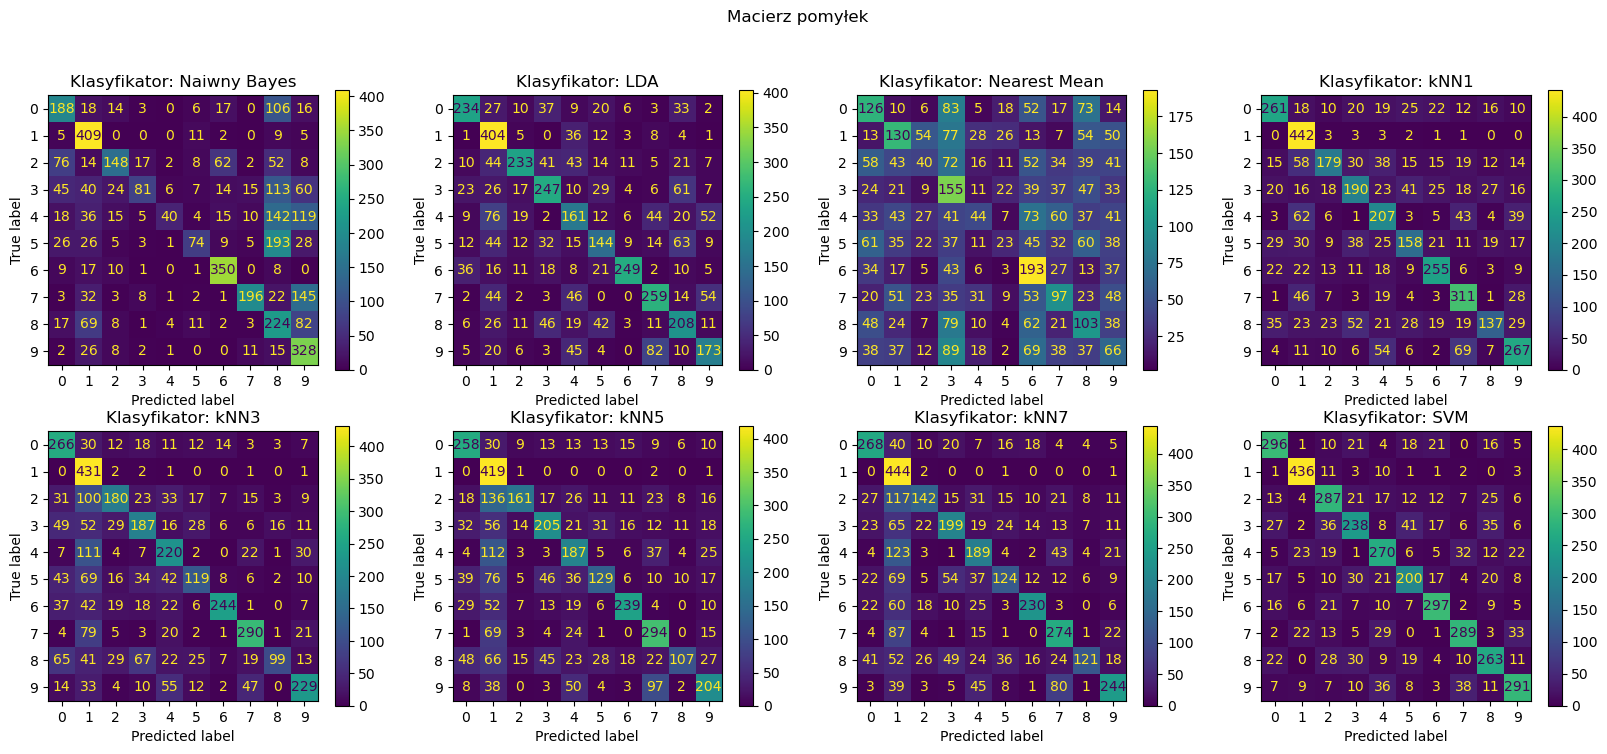

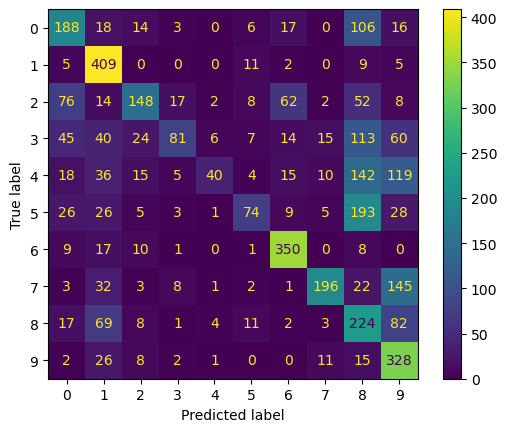

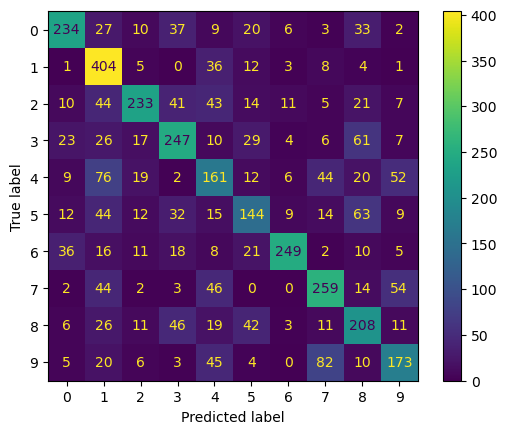

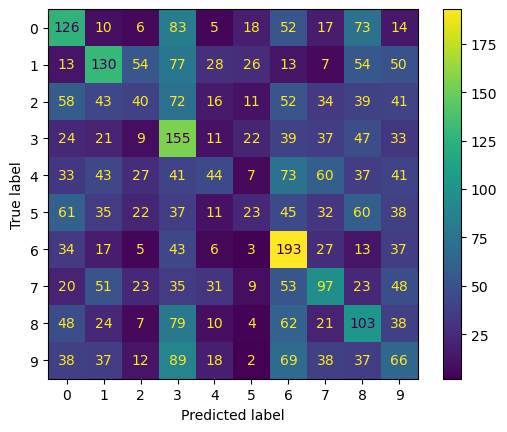

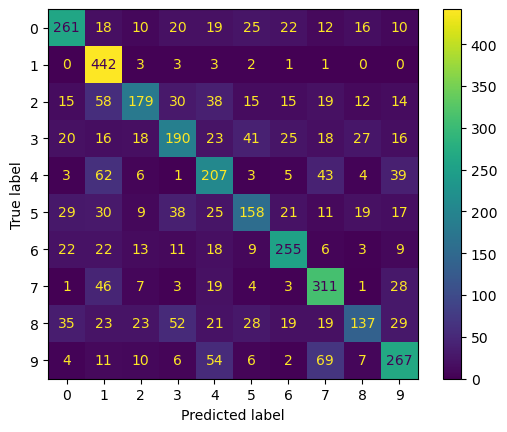

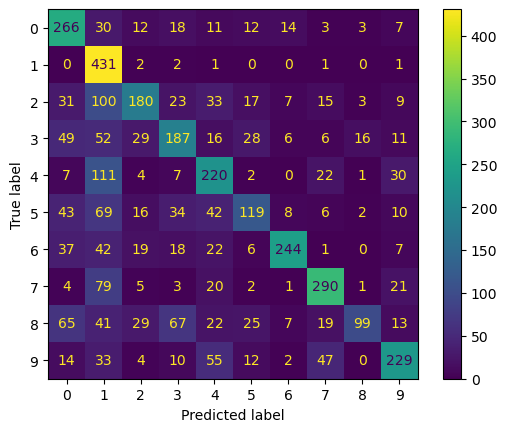

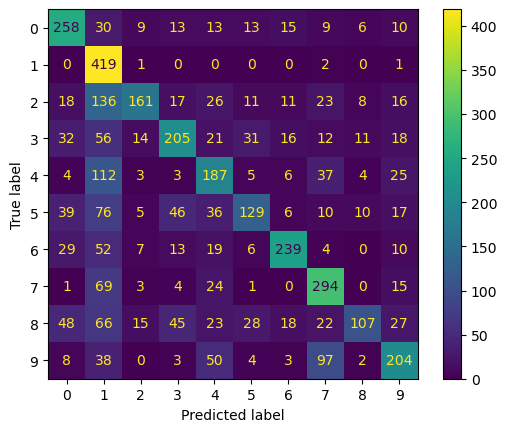

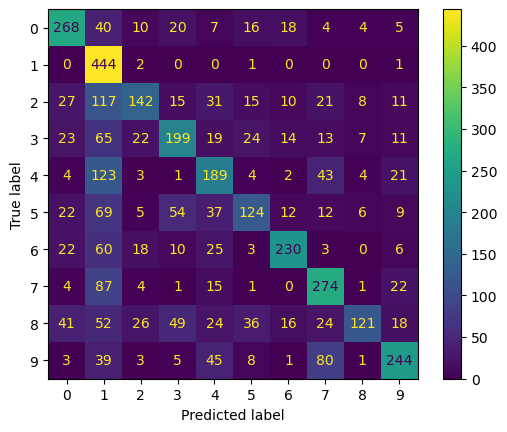

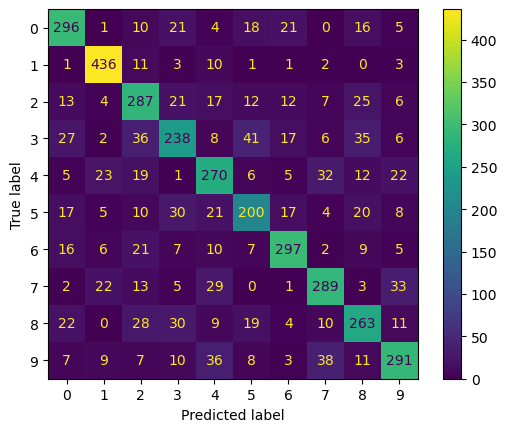

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_HH2_reshape, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

In [17]:
images_haar_LL3 = np.empty(shape=(10000,7,7))
images_haar_LH3 = np.empty(shape=(10000,7,7))
images_haar_HL3 = np.empty(shape=(10000,7,7))
images_haar_HH3 = np.empty(shape=(10000,7,7))

# images_haar_LL = np.empty(shape=(10000,16,16))
# images_haar_LH = np.empty(shape=(10000,16,16))
# images_haar_HL = np.empty(shape=(10000,16,16))
# images_haar_HH = np.empty(shape=(10000,16,16))

for i in range(len(images_haar_LL2)):
    db_decompo_2 = pywt.dwt2(images_haar_LL2[i], wavelet_type)
    LL, (LH, HL, HH) = db_decompo_2
    images_haar_LL3[i] = LL
    images_haar_LH3[i] = LH
    images_haar_HL3[i] = HL
    images_haar_HH3[i] = HH


In [18]:
images_haar_LL3_reshape = np.reshape(images_haar_LL3, (images_haar_LL3.shape[0], -1))
images_haar_LH3_reshape = np.reshape(images_haar_LH3, (images_haar_LH3.shape[0], -1))
images_haar_HL3_reshape = np.reshape(images_haar_HL3, (images_haar_HL3.shape[0], -1))
images_haar_HH3_reshape = np.reshape(images_haar_HH3, (images_haar_HH3.shape[0], -1))

In [19]:
decompo_list = [images_haar_LL3_reshape, images_haar_LH3_reshape, images_haar_HL3_reshape,images_haar_HH3_reshape]
type_name = ['LL3','LH3','HL3','HH3']

In [20]:
test_sample = 0.4
for index, k in enumerate(decompo_list):
  print(type_name[index])
  for idx, i in enumerate(classifiers):
    print('Model: ',i)
    sumAcc = 0
    meanAcc = 0
    start_time = time.time() 
    for j in range(10):
        model = i
        predicted, X_test, y_test = fit_model(i,test_sample, k, label)
        sumAcc += metrics.accuracy_score(y_test, predicted)
    meanAcc = sumAcc/10
    end_time = time.time()  # Koniec mierzenia czasu
    elapsed_time = end_time - start_time
    print('Średnia dokłądności: ',meanAcc)
    print('Czas obliczania: ', elapsed_time, ' sekund')

LL3
Model:  GaussianNB()
Średnia dokłądności:  0.5529499999999999
Czas obliczania:  0.28139519691467285  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.7889750000000001
Czas obliczania:  0.5421285629272461  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.559825
Czas obliczania:  0.06936311721801758  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.7351499999999999
Czas obliczania:  2.729173421859741  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.7529
Czas obliczania:  2.74160099029541  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.7591
Czas obliczania:  2.750410556793213  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.7673
Czas obliczania:  2.805281162261963  sekund
Model:  SVC()
Średnia dokłądności:  0.7949999999999999
Czas obliczania:  35.030762672424316  sekund
LH3
Model:  GaussianNB()
Średnia dokłądności:  0.5975250000000001
Czas oblicz

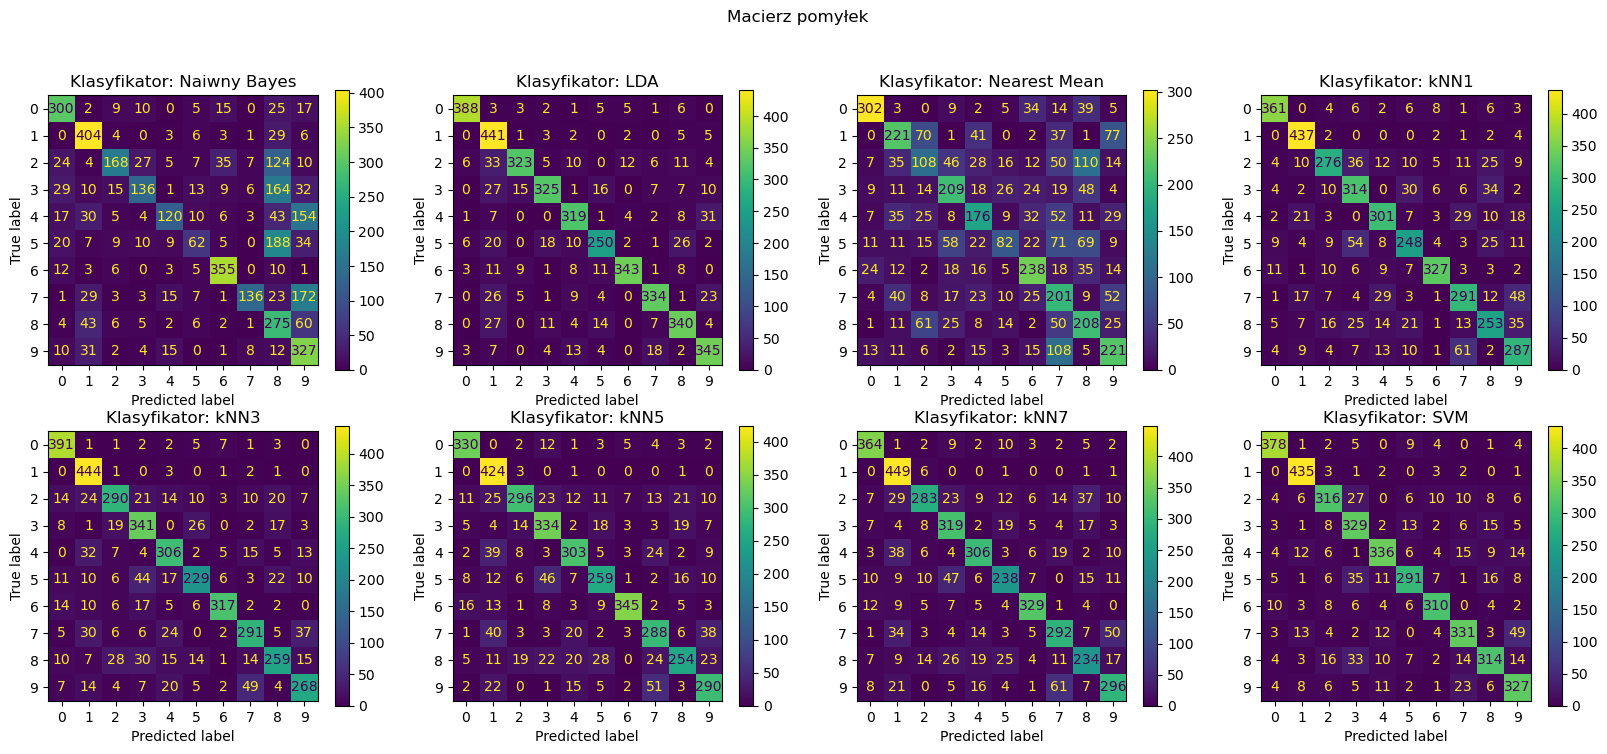

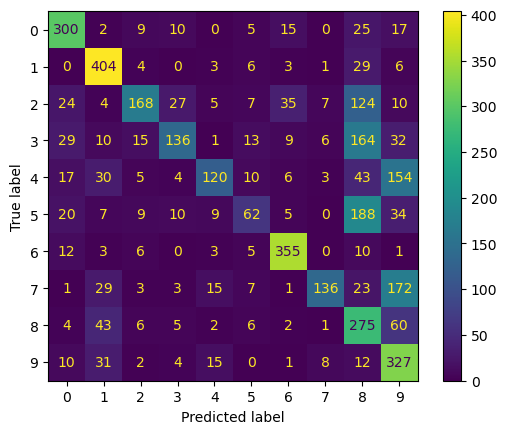

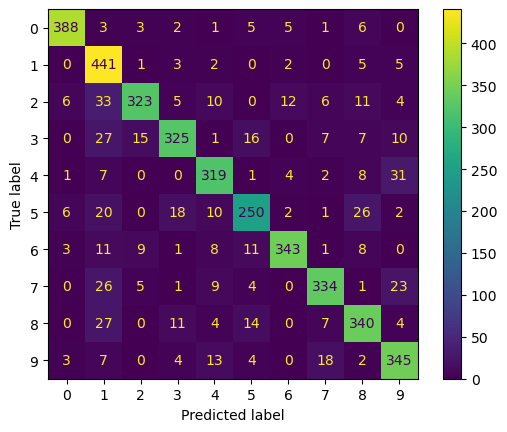

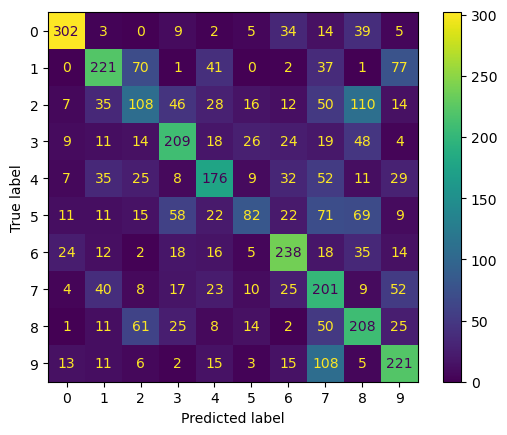

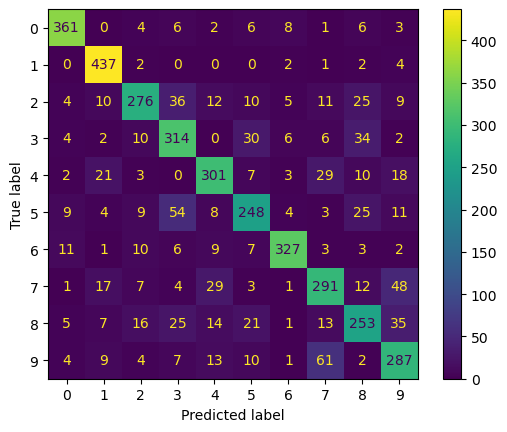

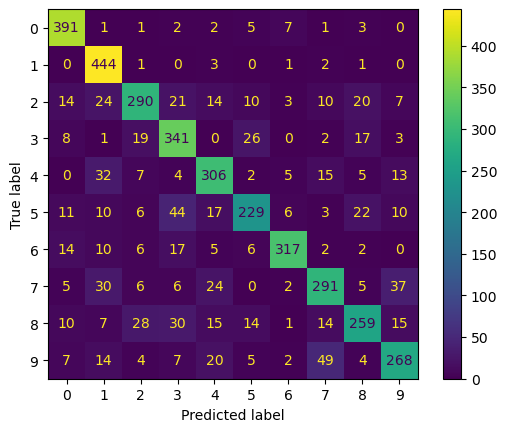

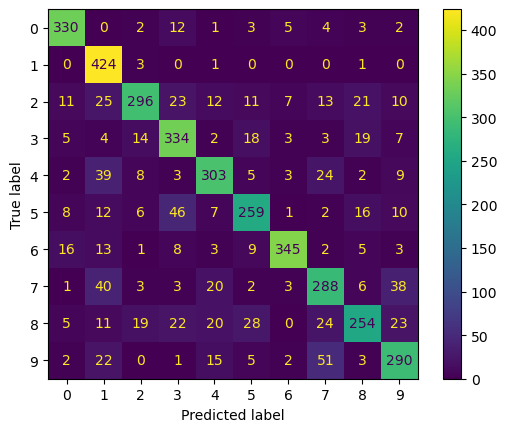

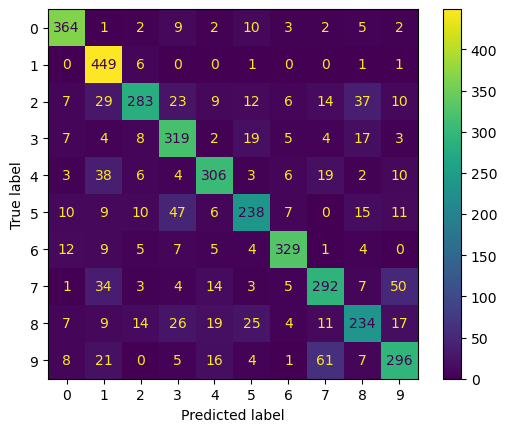

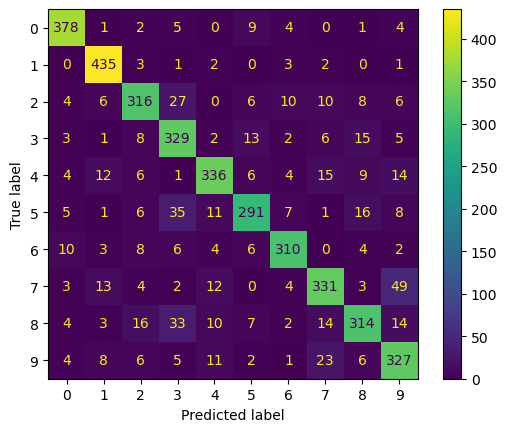

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_HH3_reshape, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()